#Oils ANOVA

#Installing and importing relevant libraries

In [15]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=587ba0c99960fb05cb21ae63e7d34d032c8c7a7ea1327ffbaea03cc3e2a090e5
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [16]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
from scipy import stats
from scipy.stats import shapiro

In [2]:
df = pd.DataFrame({
    'Cars': np.repeat([1, 2, 3, 4, 5], 4),
    'Oil': np.tile([1, 2, 3, 4], 5),
    'Mileage': [36, 38, 30, 29, 34, 38, 30, 29, 34, 28, 38, 32, 38, 34, 20, 44, 26, 28, 34, 50]
})

In [3]:
df.head()

,Cars,Oil,Mileage
0,1,1,36
1,1,2,38
2,1,3,30
3,1,4,29
4,2,1,34


#Assumptions

##Normality

The dependent variable should be approximately normally distributed for each group of the within-subjects factor. This assumption can be checked using methods like a Shapiro-Wilk test for normality or graphical methods such as Q-Q plots.

In [9]:
# Checking Normality - Shapiro-Wilk Test
normality_results = {}
for oil_type in df['Oil'].unique():
    w, p_value = shapiro(df[df['Oil'] == oil_type]['Mileage'])
    normality_results[f"Oil Type {oil_type}"] = p_value


normality_results

{'Oil Type 1': 0.22791993618011475,
 'Oil Type 2': 0.1054743230342865,
 'Oil Type 3': 0.6155813932418823,
 'Oil Type 4': 0.14718401432037354}

For all four oil types, the p-values are greater than the conventional alpha level of 0.05. This suggests that we do not have sufficient evidence to reject the null hypothesis of normality for the mileage distributions of each oil type. In other words, the assumption of normality appears to be satisfied for each group.



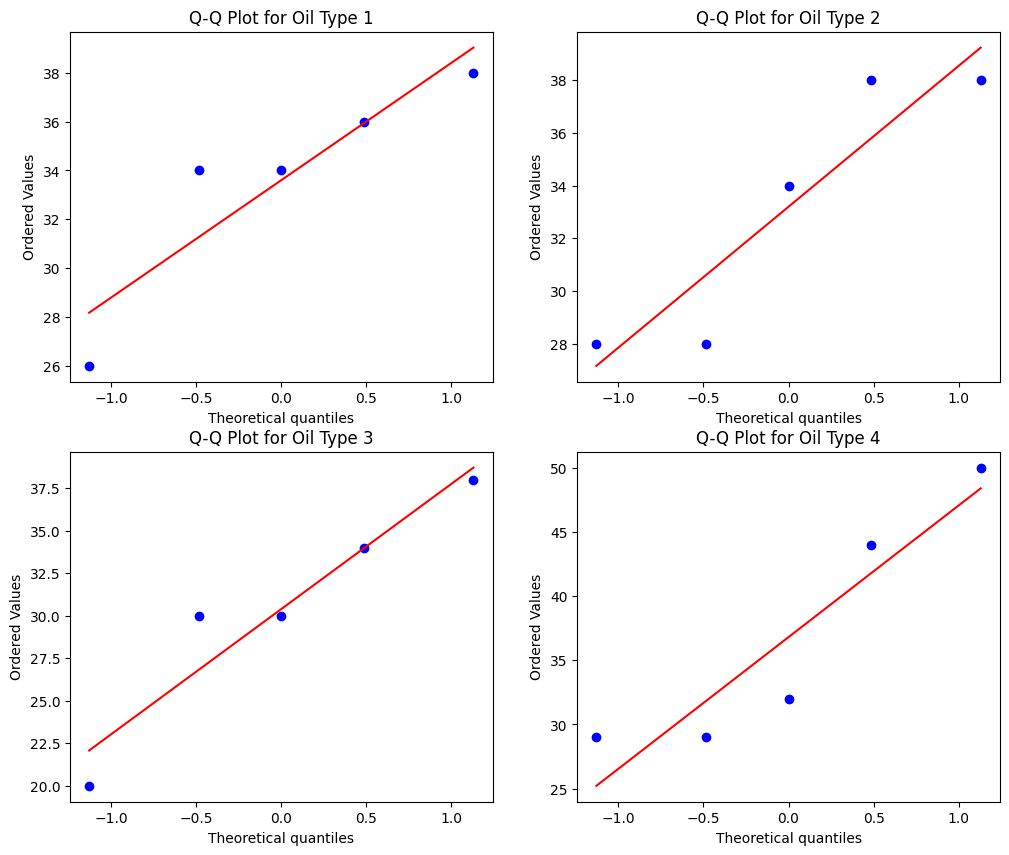

In [25]:
plt.figure(figsize=(12, 10))
for i, oil_type in enumerate(df['Oil'].unique(), 1):
    plt.subplot(2, 2, i)
    stats.probplot(df[df['Oil'] == oil_type]['Mileage'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for Oil Type {oil_type}')

The Q-Q plots also support this conclusion. In these plots, if the points closely follow the straight line, it indicates that the data is approximately normally distributed. The plots for each oil type show that the points are reasonably aligned along the line, which is consistent with the assumption of normality being met.

##Sphericity

This assumption requires that the variances of the differences between all combinations of related groups (levels of the within-subjects factor) are equal. Sphericity can be assessed using Mauchly's test.

In [19]:
#Checking Sphericity
mauchly_test = pg.sphericity(data=df, dv='Mileage', within='Oil', subject='Cars')

mauchly_test

SpherResults(spher=True, W=0.28740984224030347, chi2=3.394192052583435, dof=5, pval=0.6589629981191089)

Based on Mauchly's test, sphericity is not violated in your repeated-measures ANOVA design.

#ANOVA

In [21]:
anova_model = AnovaRM(data=df, depvar='Mileage', subject='Cars', within=['Oil'])
results = anova_model.fit()

results.summary()

,F Value,Num DF,Den DF,Pr > F
Oil,0.5679,3.0000,12.0000,0.6466


Result: The ANOVA showed a p-value of 0.6466 for the oil factor, indicating no significant difference in the mileage across different oils.

#Conclusion

The results of the repeated-measures ANOVA indicate that there is no statistically significant difference in mileage across the different engine oils. This conclusion is drawn from the p-value (Pr > F) associated with the 'Oil' factor, which is 0.6466. Since this p-value is greater than the common alpha level of 0.05, it suggests that the differences in mileage observed between the different engine oils are not statistically significant. Based on this analysis, the choice of engine oil (among the four tested) does not significantly impact the mileage of the cars in the study